This is some initial exploration of the SSA_StopBusTimeSeries_5 dataset.


NB: I'm going to use normal data wrangling libraries and techniques to play around with this dataset. It's a pretty small dataset so I don't really see why we need to use data stream specific technqiues until we're actually building models.

In [2]:
!python3 -m venv venv
!source venv/bin/activate
# !./venv/Scripts/Activate.ps1

Actual environment location may have moved due to redirects, links or junctions.
  Requested location: "Z:\home\ryan\Data_Streams\venv\Scripts\python.exe"
  Actual location:    "\\wsl.localhost\Ubuntu-24.04\home\ryan\Data_Streams\venv\Scripts\python.exe"
'source' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!pip install pandas matplotlib --quiet

# Imports

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df_boarding = pd.read_csv('boarding_03-05_2024.csv')
df_landing = pd.read_csv('landing_03-05_2024.csv')
df_load = pd.read_csv('loader_03-05_2024.csv')

In [7]:
df_boarding['Unnamed: 0'] = pd.to_datetime(df_boarding['Unnamed: 0'])
df_boarding.set_index('Unnamed: 0', inplace=True)
df_landing['Unnamed: 0'] = pd.to_datetime(df_landing['Unnamed: 0'])
df_landing.set_index('Unnamed: 0', inplace=True)
df_load['Unnamed: 0'] = pd.to_datetime(df_load['Unnamed: 0'])
df_load.set_index('Unnamed: 0', inplace=True)

# Info

## Bus Stops

| Stop ID    | Location                                               | Observations                                                                 |
|------------|--------------------------------------------------------|------------------------------------------------------------------------------|
| 44783654   | In front of the Federal University of Bahia (UFBA)     | High volume of students and university staff                                 |
| 43768720   | Lapa Station                                           | One of the city's main public transport terminals                            |
| 230565994  | Itapuã Lighthouse Beach                                | Passenger flow varies throughout the day; higher on weekends and holidays    |
| 125960550  | Arena Fonte Nova surroundings                          | Demand influenced by sports and cultural events                              |
| 45833547   | Near Manoel Barradas Stadium                           | Sharp increases in demand during game days                                   |
| 44784438   | Near the Ferry Boat terminal                           | Primarily serves intercity and cross-bay travelers                           |
| 47568123   | Near a major shopping mall                             | High commercial traffic throughout the day                                   |
| 44072192   | Close to Castro Alves Theater                          | Passenger flow increases during performance and event hours                  |
| 258781031  | Salvador Bus Station                                   | Central hub for urban and intercity bus routes                               |
| 44783914   | Lacerda Elevator tourist area                          | Located in a busy commercial and tourist district                            |


## 📅 Events & Public Holidays in Salvador, Bahia (March–May 2024)



### March 2024
- **March 25** – 🌕 *Penumbral Lunar Eclipse*  
  Visible in Salvador during early morning hours. A unique astronomical event for skywatchers.

- **March 29** – ✝️ *Good Friday (Sexta-feira Santa)*  
  National public holiday commemorating the crucifixion of Jesus Christ.

- **March 31** – ✝️ *Easter Sunday (Domingo de Páscoa)*  
  Celebrates the resurrection of Jesus Christ.

---

### April 2024
- **April 5** – 🎶 *Festival Village Borrego 2024*  
  Celebration of music and culture in Salvador.

- **April 15** – 🥁 *Ilê Aiyê 50th Anniversary Workshop*  
  Dance and percussion workshop by the oldest Afro-Brazilian carnival group.

- **April 21** – 🇧🇷 *Tiradentes Day (Dia de Tiradentes)*  
  National holiday honoring Joaquim José da Silva Xavier (Tiradentes), a Brazilian independence hero.

---

### May 2024
- **May 1** – ⚒️ *Labor Day (Dia do Trabalhador)*  
  National holiday celebrating labor rights and workers.

- **May 12** – 👩‍👧 *Mother's Day (Dia das Mães)*  
  Celebrated on the second Sunday of May in Brazil.

- **May 19** – 🏍️ *Distinguished Gentleman’s Ride – Salvador*  
  Global motorcycle event promoting men’s health awareness, with a stylish ride through the city.

- **May 22–24** – 🛢️ *Bahia Oil & Gas Energy 2024*  
  Industry conference at the Salvador Convention Center focused on energy transition and petrochemicals.

- **May 30** – ✝️ *Corpus Christi*  
  Religious holiday with processions and mass across Brazil.

## EDA

In [14]:
df_boarding.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21840 entries, 2024-03-01 05:00:00 to 2024-05-31 00:55:00
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   125960550  21840 non-null  int64
 1   230565994  21840 non-null  int64
 2   258781031  21840 non-null  int64
 3   43768720   21840 non-null  int64
 4   44072192   21840 non-null  int64
 5   44783654   21840 non-null  int64
 6   44783914   21840 non-null  int64
 7   44784438   21840 non-null  int64
 8   45833547   21840 non-null  int64
 9   47568123   21840 non-null  int64
dtypes: int64(10)
memory usage: 1.8 MB


We have 21840 data points for each bus stop.

In [9]:
df_boarding.index.min(), df_boarding.index.max()

(Timestamp('2024-03-01 05:00:00'), Timestamp('2024-05-31 00:55:00'))

In [10]:
df_landing.index.min(), df_landing.index.max()

(Timestamp('2024-03-01 05:00:00'), Timestamp('2024-05-31 00:55:00'))

In [11]:
df_load.index.min(), df_load.index.max()

(Timestamp('2024-03-01 05:00:00'), Timestamp('2024-05-31 00:55:00'))

In [12]:
earliest_date = df_boarding.index.min().date()
latest_date = df_boarding.index.max().date()

We have an almost complete three months of data.

In [13]:
for col in df_boarding:
    print(f'Stop {col}:\nMean: {df_boarding[col].mean()}, Max: {df_boarding[col].max()}')

Stop 125960550:
Mean: 0.001510989010989011, Max: 1
Stop 230565994:
Mean: 0.1662087912087912, Max: 3
Stop 258781031:
Mean: 39.58328754578755, Max: 165
Stop 43768720:
Mean: 152.03186813186812, Max: 620
Stop 44072192:
Mean: 3.120787545787546, Max: 23
Stop 44783654:
Mean: 4.948168498168498, Max: 42
Stop 44783914:
Mean: 10.278937728937729, Max: 49
Stop 44784438:
Mean: 1.6360347985347985, Max: 15
Stop 45833547:
Mean: 0.008104395604395605, Max: 2
Stop 47568123:
Mean: 3.4168498168498167, Max: 35


In [10]:
for col in df_landing:
    print(f'Stop {col}:\nMean: {df_landing[col].mean()}, Max: {df_landing[col].max()}')

Stop 125960550:
Mean: 0.0027014652014652014, Max: 1
Stop 230565994:
Mean: 0.0, Max: 0
Stop 258781031:
Mean: 21.527289377289378, Max: 77
Stop 43768720:
Mean: 61.40837912087912, Max: 523
Stop 44072192:
Mean: 1.539514652014652, Max: 13
Stop 44783654:
Mean: 5.896336996336997, Max: 50
Stop 44783914:
Mean: 2.979945054945055, Max: 36
Stop 44784438:
Mean: 0.5325091575091575, Max: 4
Stop 45833547:
Mean: 0.0054487179487179484, Max: 1
Stop 47568123:
Mean: 4.755402930402931, Max: 28


In [11]:
for col in df_load:
    print(f'Stop {col}:\nMean: {df_load[col].mean()}, Max: {df_load[col].max()}')

Stop 125960550:
Mean: 1.529532967032967, Max: 11
Stop 230565994:
Mean: 2.6128663003663, Max: 33
Stop 258781031:
Mean: 174.85966117216117, Max: 528
Stop 43768720:
Mean: 269.6717948717949, Max: 878
Stop 44072192:
Mean: 16.176007326007326, Max: 89
Stop 44783654:
Mean: 36.28264652014652, Max: 154
Stop 44783914:
Mean: 47.45123626373626, Max: 247
Stop 44784438:
Mean: 35.40086996336996, Max: 145
Stop 45833547:
Mean: 11.35521978021978, Max: 59
Stop 47568123:
Mean: 20.208791208791208, Max: 67


Some of the bus stops are really busy and some don't really seem to be used at all.

In [12]:
def plot_time_series(df):
    # Plot all columns
    plt.figure(figsize=(20, 6))
    for column in df.columns:
        plt.plot(df.index, df[column], label=column)
    
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title("Bus Stop Time Series")
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.tight_layout()
    plt.show()

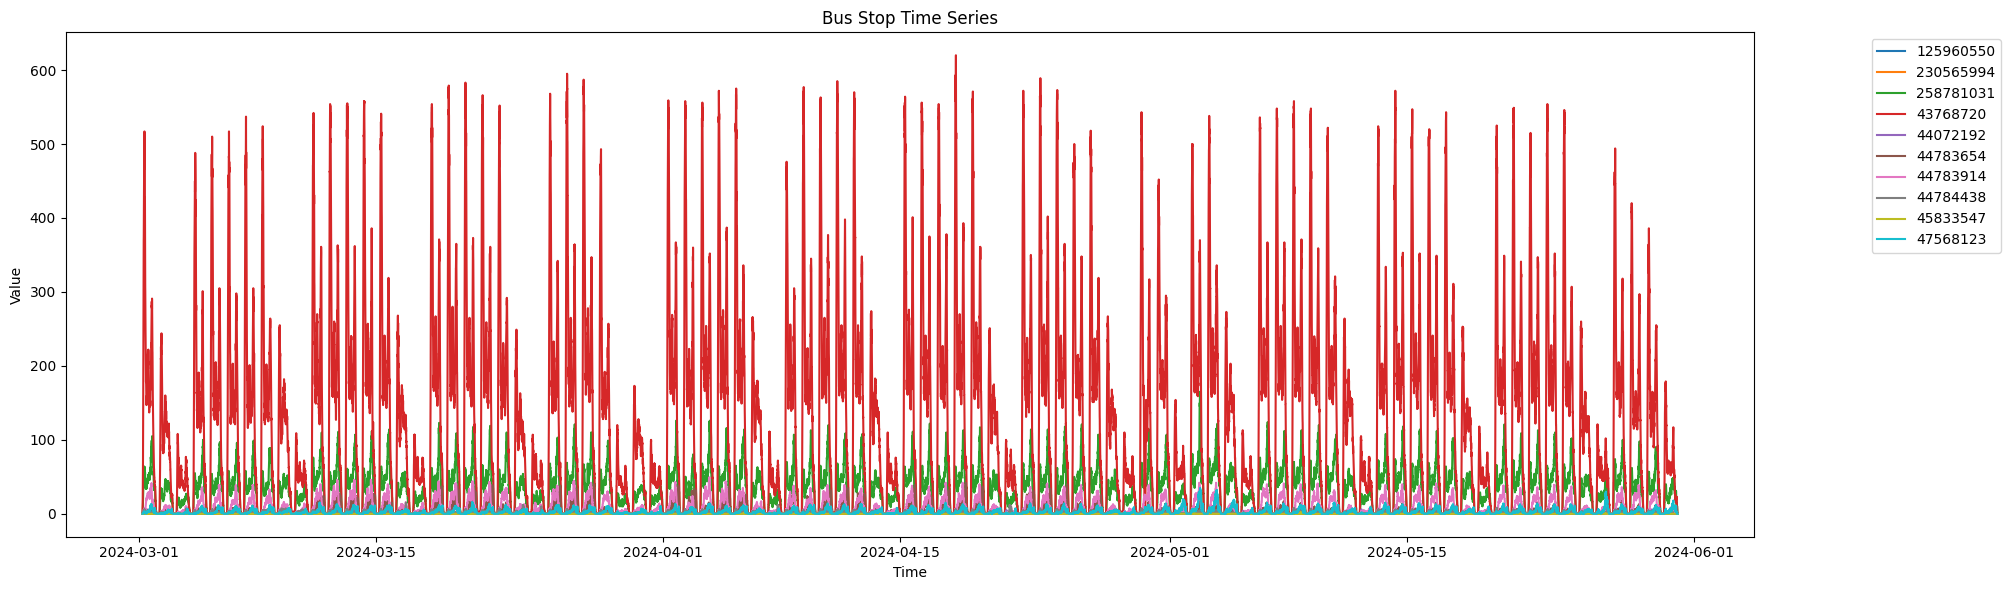

In [13]:
plot_time_series(df_boarding)

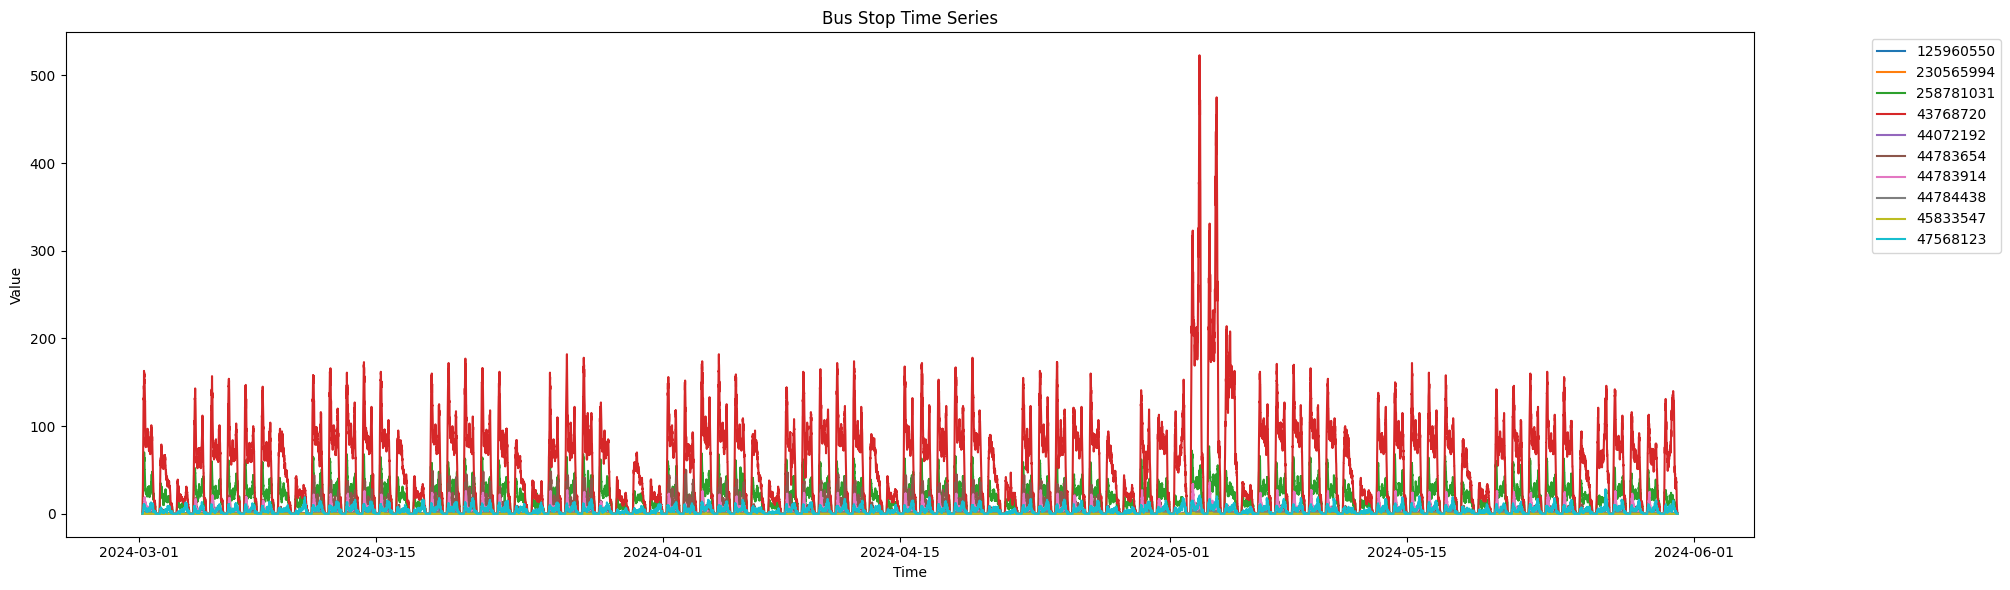

In [14]:
plot_time_series(df_landing)

In [15]:
df_landing[df_landing['43768720'] > 200]

,125960550,230565994,258781031,43768720,44072192,44783654,44783914,44784438,45833547,47568123
Unnamed: 0,,,,,,,,,,
2024-05-02 06:40:00,0,0,57,203,4,11,7,1,0,12
2024-05-02 06:45:00,0,0,59,214,5,12,8,1,0,13
2024-05-02 06:50:00,0,0,62,206,5,13,9,1,0,12
2024-05-02 06:55:00,0,0,59,233,7,13,10,1,0,14
2024-05-02 07:00:00,0,0,60,237,7,15,10,1,0,15
...,...,...,...,...,...,...,...,...,...,...
2024-05-04 08:30:00,0,0,41,214,3,6,9,2,0,8
2024-05-04 12:55:00,0,0,32,204,1,2,4,2,0,7
2024-05-04 13:00:00,0,0,33,204,1,3,5,2,0,7


There were a lot of alightings at Lapa Station from 2nd-4th May 2024

My best guess is that it was because of this: https://g1.globo.com/ba/bahia/noticia/2024/04/10/rodoviarios-em-aviso-previo-e-anuncio-de-suspensao-de-linhas-entenda-crise-no-transporte-metropolitano-de-salvador.ghtml. One specific company stopped operating a route that included Lapa Station.

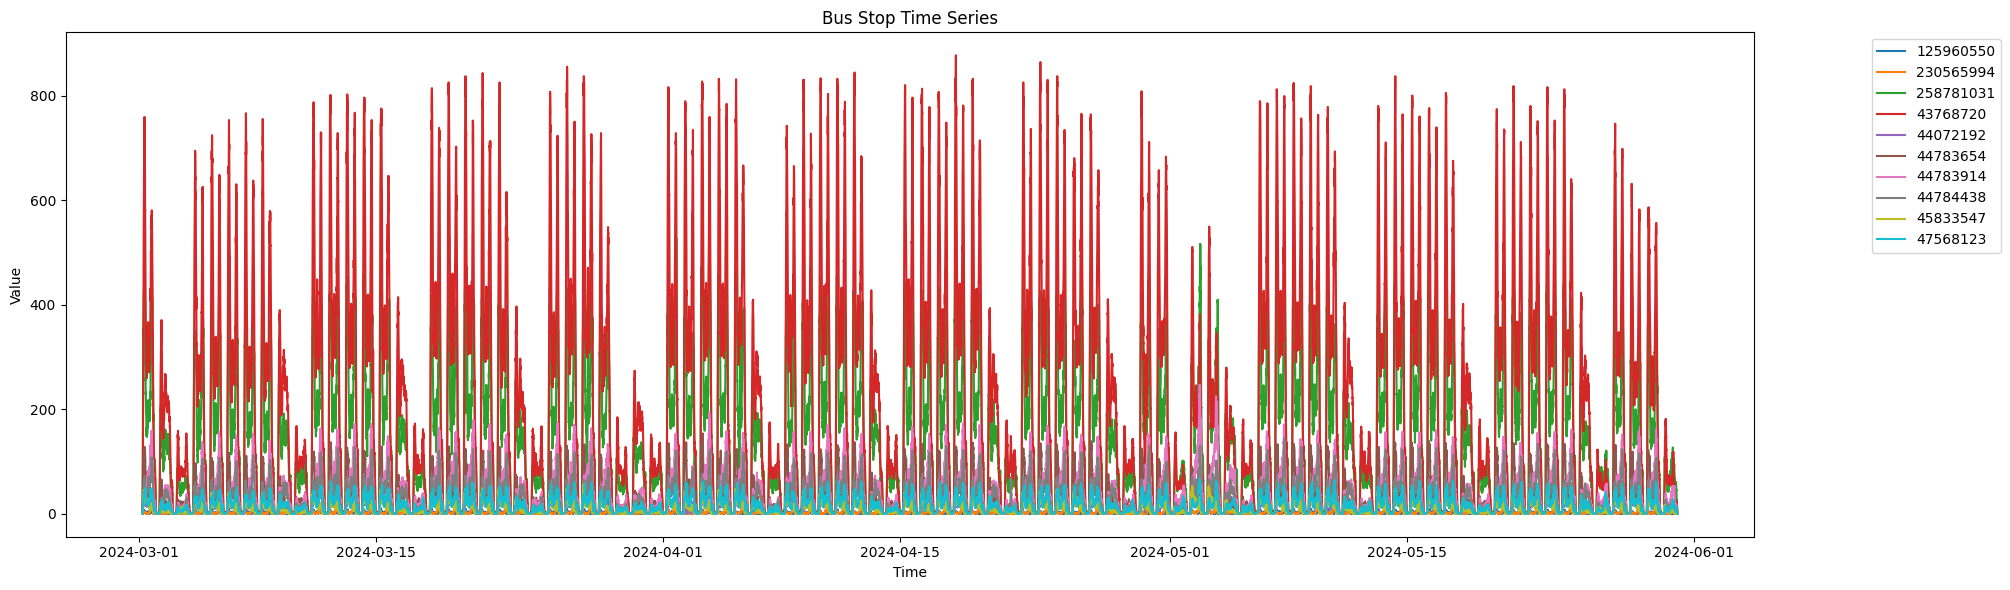

In [16]:
plot_time_series(df_load)

# Flu-Like Symptom Dataset

I got this dataset from: https://opendatasus.saude.gov.br/dataset/notificacoes-de-sindrome-gripal-leve-2024, and selected data from the state BA (Bahia)

In [ ]:
# df_flu = pd.read_csv('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SGL/2024/uf=BA/lote=1/part-00000-cd8a94f2-cc48-4829-b85b-a061de7ed6a3.c000.csv',sep=';')

df_flu = pd.read_csv('flu_dataset.csv', sep=';')
translated_columns = [
    "symptoms", "healthProfessional", "raceColor", "otherSymptoms",
    "otherConditions", "securityProfessional", "occupationCode", "conditions", "sex",
    "state", "stateIBGE", "municipality", "municipalityIBGE", "origin",
    "notificationState", "notificationMunicipality", "notificationMunicipalityIBGE",
    "caseOutcome", "finalClassification", "covidStrategyCode",
    "asymptomaticActiveSearchCode", "otherAsymptomaticActiveSearch",
    "specificPopulationScreeningCode", "otherSpecificPopulationScreening",
    "testingLocationCode", "otherTestingLocation",
    "receivedVaccineCode", "firstDoseLabCode",
    "secondDoseLabCode", "firstDoseBatch", "secondDoseBatch",
    "traditionalCommunityCode", "source_id", "excluded",
    "validated", "vaccineDoseCode", "notificationStateIBGE",
    "totalTestsPerformed", "notificationDate", "symptomOnsetDate",
    "caseClosureDate", "firstDoseDate", "secondDoseDate",
    "test1StateCode", "test1TypeCode", "test1ManufacturerCode",
    "test1ResultCode", "test2StateCode", "test2TypeCode",
    "test2ManufacturerCode", "test2ResultCode", "test3StateCode",
    "test3TypeCode", "test3ManufacturerCode", "test3ResultCode",
    "test4StateCode", "test4TypeCode", "test4ManufacturerCode",
    "test4ResultCode", "test1CollectionDate", "test2CollectionDate",
    "test3CollectionDate", "test4CollectionDate", "age"
]
df_flu.columns = translated_columns

ParserError: Error tokenizing data. C error: Expected 3 fields in line 17, saw 4


In [18]:
df_flu['notificationDate'] = pd.to_datetime(df_flu['notificationDate'])

Filter only for flu notifications in the correct dates...

In [19]:
notification_in_correct_dates = df_flu['notificationDate'].apply(lambda x: not pd.isna(x) and (x.date() >= earliest_date and x.date() <= latest_date))
df_flu = df_flu[(df_flu['notificationMunicipality'] == 'Salvador') & notification_in_correct_dates].reset_index(drop=True)

Reindex as time series

In [20]:
time_series_flu = df_flu['notificationDate'].value_counts().sort_index()
# Create full date range from min to max
full_index = pd.date_range(start=time_series_flu.index.min(), end=time_series_flu.index.max())
# Reindex to full range and fill missing with 0
time_series_flu_full = time_series_flu.reindex(full_index, fill_value=0)
# Optional: set name and convert to DataFrame if needed
time_series_flu_full.name = 'case_count'

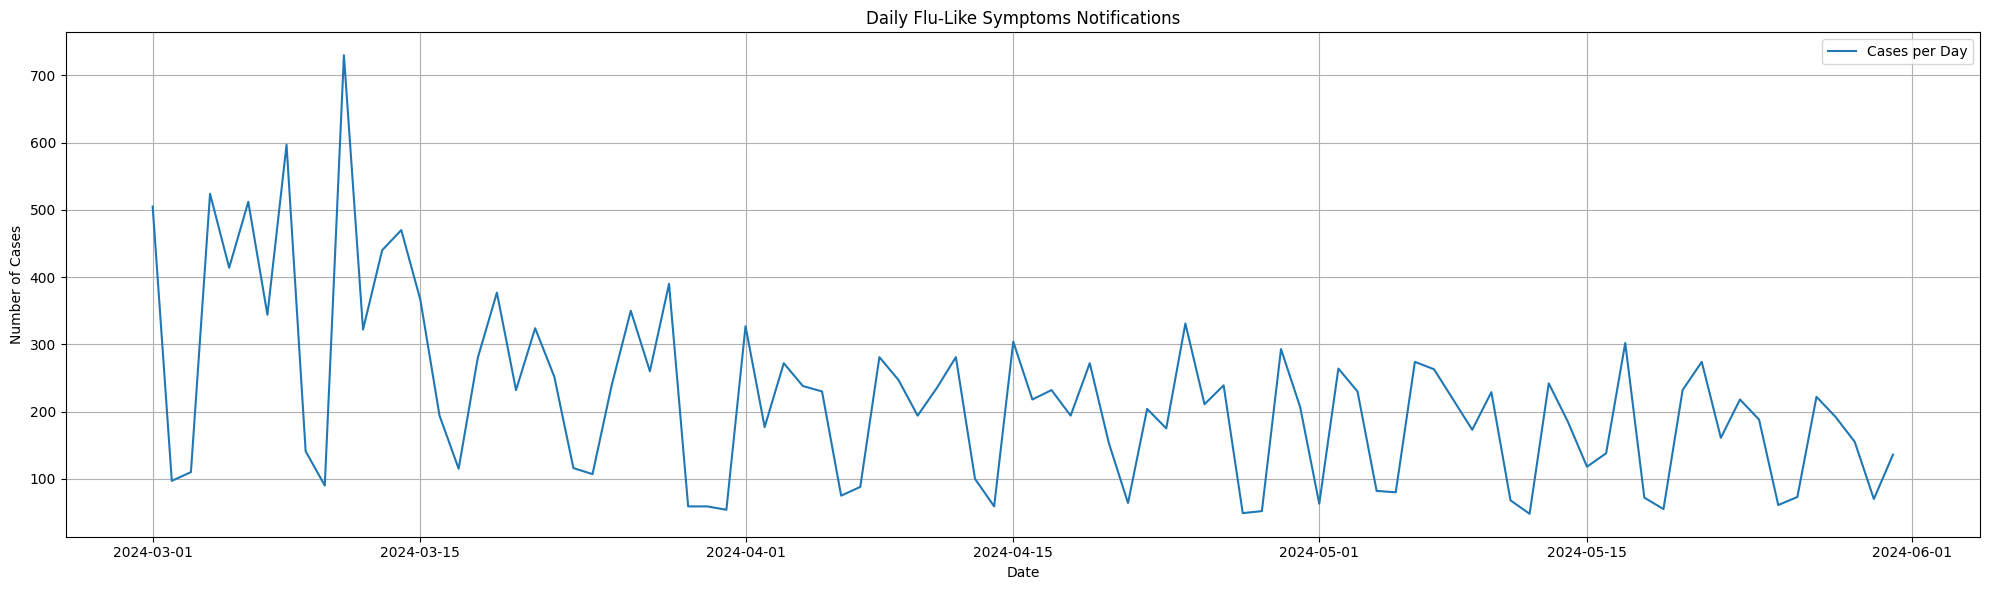

In [21]:
plt.figure(figsize=(20, 6))
plt.plot(time_series_flu_full.index, time_series_flu_full.values, label='Cases per Day')

plt.title("Daily Flu-Like Symptoms Notifications")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Possible things to do:
- If you wanted to correlate flu symptoms against public transport statistics, would need to take into account incubation period for flu (i.e. can we make a streaming model to predict the number of flu notifications).
- Could look at both time and spatial correlation.
- Could break things down by demographics / other characteristics.

# Dengue Dataset

This uses the 2024 dengue dataset: https://opendatasus.saude.gov.br/dataset/arboviroses-dengue/resource/4cf2f7b8-9920-41b5-817a-1ffc13e0690c

It's a bit big to download in full every time you run this notebook, so I've provided a smaller version.

In [22]:
#df_all_dengue = pd.read_csv('DENGBR24.csv')
#translated_columns = ["notificationType", "diseaseID", "notificationDate", "notificationWeek", "notificationYear", "notificationStateAbbr", "notificationMunicipalityID", "notificationRegionalID", "notificationUnitID", "symptomOnsetDate", "onsetWeek", "birthYear", "ageInYears", "sex", "pregnancyStatus", "raceColor", "educationLevel", "residenceStateAbbr", "residenceMunicipalityID", "residenceRegionalID", "countryID", "investigationDate", "occupationID", "fever", "myalgia", "headache", "rash", "vomiting", "nausea", "backPain", "conjunctivitis", "arthritis", "arthralgia", "petechiae", "leukopenia", "tourniquetTest", "retroOrbitalPain", "diabetes", "hematologicDisorder", "liverDisease", "kidneyDisease", "hypertension", "pepticUlcer", "autoimmuneDisease", "chikungunyaDateS1", "chikungunyaDateS2", "prntDate", "chikungunyaResultS1", "chikungunyaResultS2", "prntResult", "serologyDate", "serologyResult", "ns1Date", "ns1Result", "viralIsolationDate", "viralIsolationResult", "pcrDate", "pcrResult", "serotype", "histopathology", "immunohistochemistry", "hospitalized", "hospitalAdmissionDate", "residenceState", "residenceMunicipality", "autochthonousType", "infectionCountryCode", "infectionCountry", "infectionCommunity", "finalClassification", "caseCriteria", "otherDisease", "clinicalChikungunya", "caseOutcome", "deathDate", "caseClosureDate", "alarmHypotension", "alarmPlatelets", "alarmVomiting", "alarmBleeding", "alarmHematocrit", "alarmAbdominalPain", "alarmLethargy", "alarmLiverEnlargement", "alarmFluidAccumulation", "alarmDate", "severePulse", "severeConvulsions", "severeSwelling", "severeRespFailure", "severeTachycardia", "severeExtremityColdness", "severeHypotension", "severeHematocritDrop", "severeMelena", "severeUterineBleeding", "severeBleeding", "severeLiverDamage", "severeMyocarditis", "severeConsciousness", "severeOrganFailure", "severeDate", "hemorrhagicManifestations", "epistaxis", "gumBleeding", "uterineBleeding", "petechiaeObserved", "hematuria", "bleeding", "tourniquetTestResult", "plasmaLeakage", "clinicalEvidence", "lowPlatelets", "confirmedDengueHemorrhagicFever", "complications", "systemType", "duplicateNotification", "dataEntryDate", "flexRetest", "flexReceived", "migratedFromW"]
#df_all_dengue.columns = translated_columns
#df_salvador_dengue = df_all_dengue[df_all_dengue['notificationMunicipalityID'] == 292740].reset_index(drop=True)
#df_salvador_dengue.to_csv('salvador_dengue.csv', index=False)

In [23]:
df_salvador_dengue = pd.read_csv('salvador_dengue.csv')

/tmp/ipykernel_1315577/1874979697.py:1: DtypeWarning: Columns (44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_salvador_dengue = pd.read_csv('salvador_dengue.csv')


In [24]:
df_salvador_dengue['notificationDate'] = pd.to_datetime(df_flu['notificationDate'])

In [25]:
notification_in_correct_dates = df_salvador_dengue['notificationDate'].apply(lambda x: not pd.isna(x) and (x.date() >= earliest_date and x.date() <= latest_date))
df_salvador_dengue = df_salvador_dengue[notification_in_correct_dates].reset_index(drop=True)

In [26]:
time_series_dengue = df_salvador_dengue['notificationDate'].value_counts().sort_index()
# Create full date range from min to max
full_index= pd.date_range(start=time_series_dengue.index.min(), end=time_series_dengue.index.max())
# Reindex to full range and fill missing with 0
time_series_dengue_full = time_series_dengue.reindex(full_index, fill_value=0)
# Optional: set name and convert to DataFrame if needed
time_series_dengue_full.name = 'case_count'

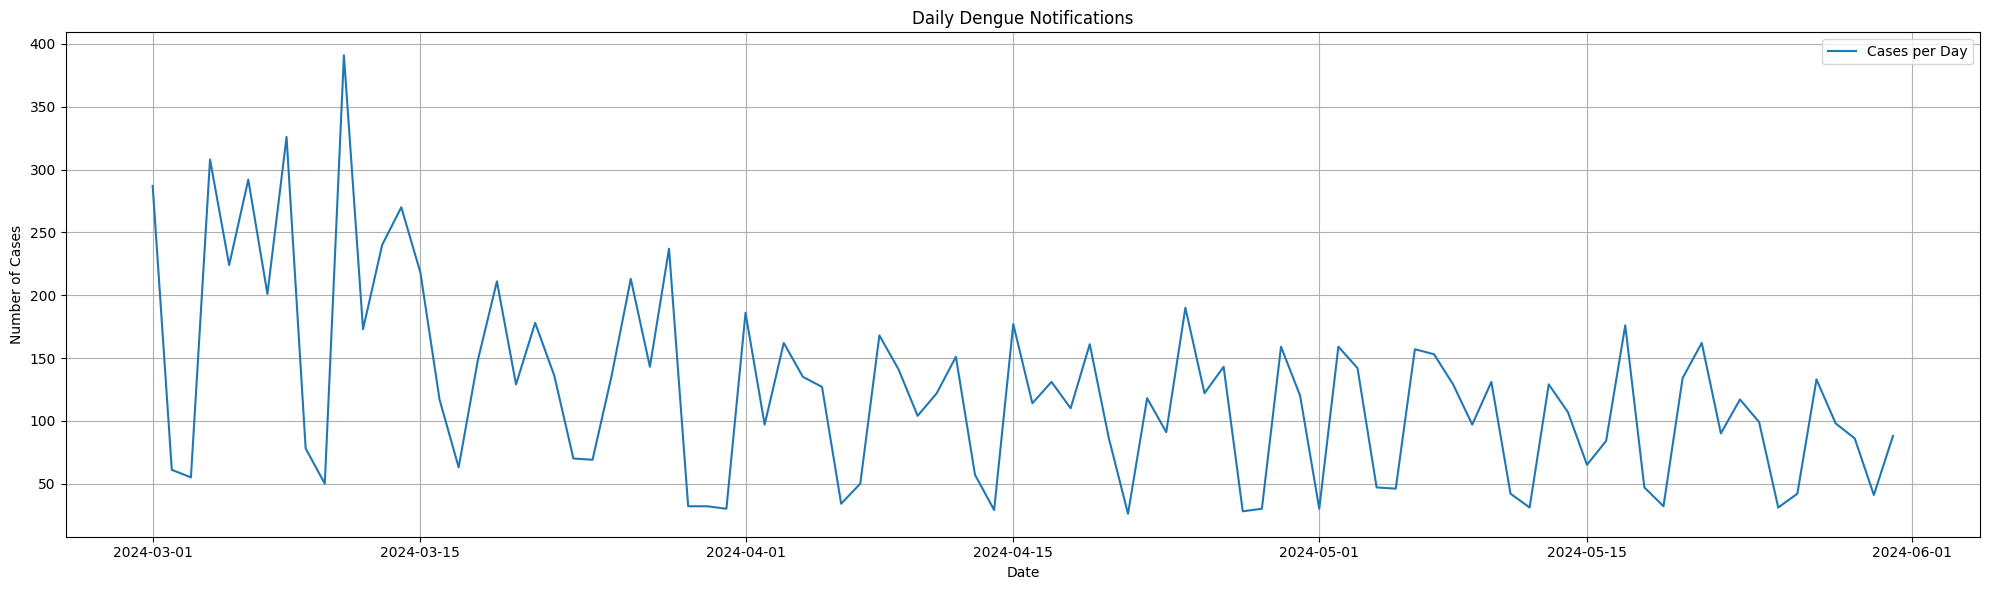

In [27]:
plt.figure(figsize=(20, 6))
plt.plot(time_series_dengue_full.index, time_series_dengue_full.values, label='Cases per Day')

plt.title("Daily Dengue Notifications")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

That's an astounding amount of dengue.

Could also run models to predict amounts of Chikungunya Fever or Zika virus (among other diseases).